<a href="https://colab.research.google.com/github/VedJ13/Heart-Disease-Prediction/blob/main/HeartSense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('heart.csv')
df.head()

print("Shape:", df.shape)
print("Missing Values:\n", df.isnull().sum())

Shape: (303, 14)
Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [7]:
df.info()
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for col in categorical_cols:
  print(f"{col}: {df[col].unique()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
sex: [1 0]
cp: [3 2 1 0]
fbs: [1 0]
restecg: [0 1 2]
exang: [0 1]
slope: [0 2 1]
ca: [0 2 1 3 4]
thal: [1 2 3 0]


In [12]:
df_encoded = pd.get_dummies(df, columns=['cp', 'thal', 'slope'], drop_first=True)
df_encoded.head()

X = df_encoded.drop('target', axis = 1)
y = df_encoded['target']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (242, 18)
Testing set size: (61, 18)


In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy Score:  0.9016393442622951
Confusion Matrix: 
 [[27  2]
 [ 4 28]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


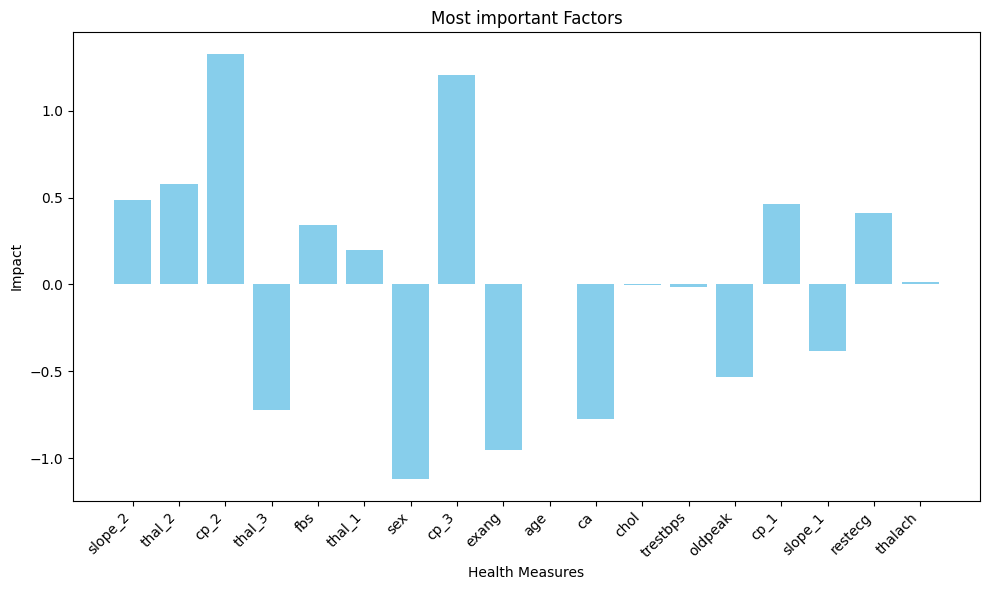

In [19]:
import numpy as np
import matplotlib.pyplot as plt

importance = model.coef_[0]
features = X.columns
indices = np.argsort(abs(importance)[::-1])

plt.figure(figsize=(10, 6))
plt.bar(features[indices], importance[indices], color = 'skyblue')
plt.title('Most important Factors')
plt.xlabel("Health Measures")
plt.ylabel("Impact")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [20]:
# Save your model first (if not already)
import joblib
joblib.dump(model, 'heartsense_model.pkl')

['heartsense_model.pkl']

In [21]:
%%writefile app.py

import streamlit as st
import pandas as pd
import joblib

# Load model
model = joblib.load('heartsense_model.pkl')

st.title("💓 HeartSense - Heart Disease Risk Predictor")

st.sidebar.header("Enter Your Health Details")

def user_input():
    age = st.sidebar.slider('Age', 20, 80, 45)
    sex = st.sidebar.selectbox('Sex (1 = male, 0 = female)', [1, 0])
    cp = st.sidebar.selectbox('Chest Pain Type (0–3)', [0, 1, 2, 3])
    trestbps = st.sidebar.slider('Resting BP', 80, 200, 120)
    chol = st.sidebar.slider('Cholesterol', 100, 400, 200)
    fbs = st.sidebar.selectbox('Fasting Blood Sugar >120', [1, 0])
    restecg = st.sidebar.selectbox('Resting ECG (0–2)', [0, 1, 2])
    thalach = st.sidebar.slider('Max Heart Rate', 70, 210, 150)
    exang = st.sidebar.selectbox('Exercise-Induced Angina', [1, 0])
    oldpeak = st.sidebar.slider('Oldpeak', 0.0, 6.0, 1.0)
    slope = st.sidebar.selectbox('Slope (0–2)', [0, 1, 2])
    ca = st.sidebar.selectbox('Major Vessels (0–4)', [0, 1, 2, 3, 4])
    thal = st.sidebar.selectbox('Thal (1,2,3)', [1, 2, 3])

    data = {
        'age': age, 'sex': sex, 'cp': cp, 'trestbps': trestbps, 'chol': chol,
        'fbs': fbs, 'restecg': restecg, 'thalach': thalach, 'exang': exang,
        'oldpeak': oldpeak, 'slope': slope, 'ca': ca, 'thal': thal
    }

    return pd.DataFrame(data, index=[0])

input_df = user_input()
st.subheader("Your Input:")
st.write(input_df)

prediction = model.predict(input_df)
risk_score = model.predict_proba(input_df)[0][1] * 100

st.subheader("Prediction Result")
if prediction[0] == 1:
    st.error("You are likely at risk of heart disease.")
    st.write(f"Risk Score: **{risk_score:.2f}%**")
    st.markdown("- Risk factors: age, cholesterol, chest pain type")
    st.info("Please consult a doctor for confirmation.")
else:
    st.success("You are likely not at risk.")
    st.write(f"Risk Score: **{risk_score:.2f}%**")


Writing app.py
